<a href="https://colab.research.google.com/github/Team9DS310-Spring2024/ds310finalproject/blob/main/DS310Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_parquet('policy.parquet')
df.to_csv('policy.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_parquet('deaths.parquet')
df.to_csv('deaths.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'deaths.parquet'

In [ ]:
import pandas as pd
df = pd.read_parquet('cases.parquet')
df.to_csv('cases.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'cases.parquet'

In [ ]:
# Load the CSV files into DataFrames
deaths_data = pd.read_csv('deaths.csv')
policy_data = pd.read_csv('policy.csv')
cases_data = pd.read_csv('cases.csv')

# print the first few rows of each DataFrame to confirm they're loaded correctly
print("Deaths DataFrame:")
print(deaths_data.head())
print("\nPolicy DataFrame:")
print(policy_data.head())
print("\nCases DataFrame:")
print(cases_data.head())

Deaths DataFrame:
   Sum of 30daysdeathAverage   Country_Date Country_Region CountryCode  \
0                 109.366667   CAN 1/1/2021         Canada         CAN   
1                 123.866667  CAN 1/10/2021         Canada         CAN   
2                 123.533333  CAN 1/11/2021         Canada         CAN   
3                 125.300000  CAN 1/12/2021         Canada         CAN   
4                 127.666667  CAN 1/13/2021         Canada         CAN   

  Sum of Death Growth Rate  Sum of Deaths  Sum of Deaths_Change  Count of ID  \
0                   -3.36%          15606                     0            1   
1                   -0.51%          16967                   123            1   
2                   -0.27%          17084                   117            1   
3                    1.43%          17231                   147            1   
4                    1.89%          17382                   151            1   

  ISO2  Sum of Latitude  Year Quarter  Month  Day  Sum o

In [ ]:
deaths_data['Date'] = pd.to_datetime(deaths_data['Country_Date'].str.split().str[-1], format='%m/%d/%Y', errors='coerce')
cases_data['Date'] = pd.to_datetime(cases_data['Country_Date'].str.split().str[-1], format='%m/%d/%Y', errors='coerce')


In [ ]:
deaths_data['Date'] = pd.to_datetime(deaths_data['Date'], errors='coerce')
cases_data['Date'] = pd.to_datetime(cases_data['Date'], errors='coerce')
policy_data['Date'] = pd.to_datetime(policy_data['Date'], errors='coerce')


In [ ]:
merged_data_corrected = pd.merge(deaths_data, policy_data, on=['CountryCode', 'Date'])


In [ ]:
print(merged_data_corrected['Sum of Death Growth Rate'].dtype)
merged_data_corrected['Sum of Death Growth Rate'] = merged_data_corrected['Sum of Death Growth Rate'].str.replace('%', '').astype(float)

object


#Death Growth Rate

In [ ]:
import statsmodels.api as sm
# Convert growth rate percentages to a float and define a threshold


threshold = 1.0  # Define a threshold for high growth rate (this is an example value)
merged_data_corrected['High_Growth'] = (merged_data_corrected['Sum of Death Growth Rate'] > threshold).astype(int)

independent_vars = ['C2_Workplaceclosing', 'C3_Cancelpublicevents',
       'C4_Restrictionsongatherings',
       'C5_Closepublictransport', 'C6_Stayathomerequirements',
       'C7_Restrictionsoninternalmovement',
       'C8_Internationaltravelcontrols', 'E1_Incomesupport',
       'E2_Debtcontractrelief', 'E3_Fiscalmeasures','E4_Internationalsupport',
       'H1_Publicinformationcampaigns', 'H2_Testingpolicy',
       'H3_Contacttracing', 'H4_Emergencyinvestmentinhealthcare',
       'H5_Investmentinvaccines', 'H6_FacialCoverings',
       'H7_Vaccinationpolicy', 'H8_Protectionofelderlypeople']  # add or remove variables as needed
X = merged_data_corrected[independent_vars]
y = merged_data_corrected['High_Growth']

X = sm.add_constant(X)

model = sm.Logit(y, X)
result = model.fit(maxiter=100)  # Increase maxiter to a higher number
print(result.summary())

         Current function value: 0.208106
         Iterations: 100
                           Logit Regression Results                           
Dep. Variable:            High_Growth   No. Observations:                 1030
Model:                          Logit   Df Residuals:                     1010
Method:                           MLE   Df Model:                           19
Date:                Tue, 07 May 2024   Pseudo R-squ.:                  0.5580
Time:                        02:32:28   Log-Likelihood:                -214.35
converged:                      False   LL-Null:                       -484.93
Covariance Type:            nonrobust   LLR p-value:                1.262e-102
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -49.5158   3.26e+05     -0.000      1.000   -6.39e+05    6

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#Confirmed Cases Growth Rate

In [ ]:
merged_data_corrected = pd.merge(cases_data, policy_data, on=['Country_Date', 'Date'])

In [ ]:
print(merged_data_corrected['Sum of Growth Case Rate'].dtype)
merged_data_corrected['Sum of Growth Case Rate'] = merged_data_corrected['Sum of Growth Case Rate'].str.replace('%', '').astype(float)



object


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'merged_data_corrected' is your DataFrame loaded with the necessary columns

threshold = 1.0  # Define a threshold for high growth rate
merged_data_corrected['High_Growth'] = (merged_data_corrected['Sum of Growth Case Rate'] > threshold).astype(int)

independent_vars = [
    'C2_Workplaceclosing', 'C3_Cancelpublicevents',
    'C4_Restrictionsongatherings', 'C5_Closepublictransport',
    'C6_Stayathomerequirements', 'C7_Restrictionsoninternalmovement',
    'C8_Internationaltravelcontrols', 'E1_Incomesupport',
    'E2_Debtcontractrelief', 'E3_Fiscalmeasures', 'E4_Internationalsupport',
    'H1_Publicinformationcampaigns', 'H2_Testingpolicy',
    'H3_Contacttracing', 'H4_Emergencyinvestmentinhealthcare',
    'H5_Investmentinvaccines', 'H6_FacialCoverings',
    'H7_Vaccinationpolicy', 'H8_Protectionofelderlypeople'
]

X = merged_data_corrected[independent_vars]
y = merged_data_corrected['High_Growth']

X = sm.add_constant(X)  # Add a constant term to the predictor set

model = sm.Logit(y, X)
result = model.fit(maxiter=52)  # You can increase maxiter if needed
print(result.summary())


         Current function value: 0.573542
         Iterations: 52
                           Logit Regression Results                           
Dep. Variable:            High_Growth   No. Observations:                 1030
Model:                          Logit   Df Residuals:                     1010
Method:                           MLE   Df Model:                           19
Date:                Tue, 07 May 2024   Pseudo R-squ.:                  0.1586
Time:                        04:22:07   Log-Likelihood:                -590.75
converged:                      False   LL-Null:                       -702.08
Covariance Type:            nonrobust   LLR p-value:                 1.005e-36
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.5860      0.399     -3.971      0.000      -2.369      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#Visuals For PowerBI

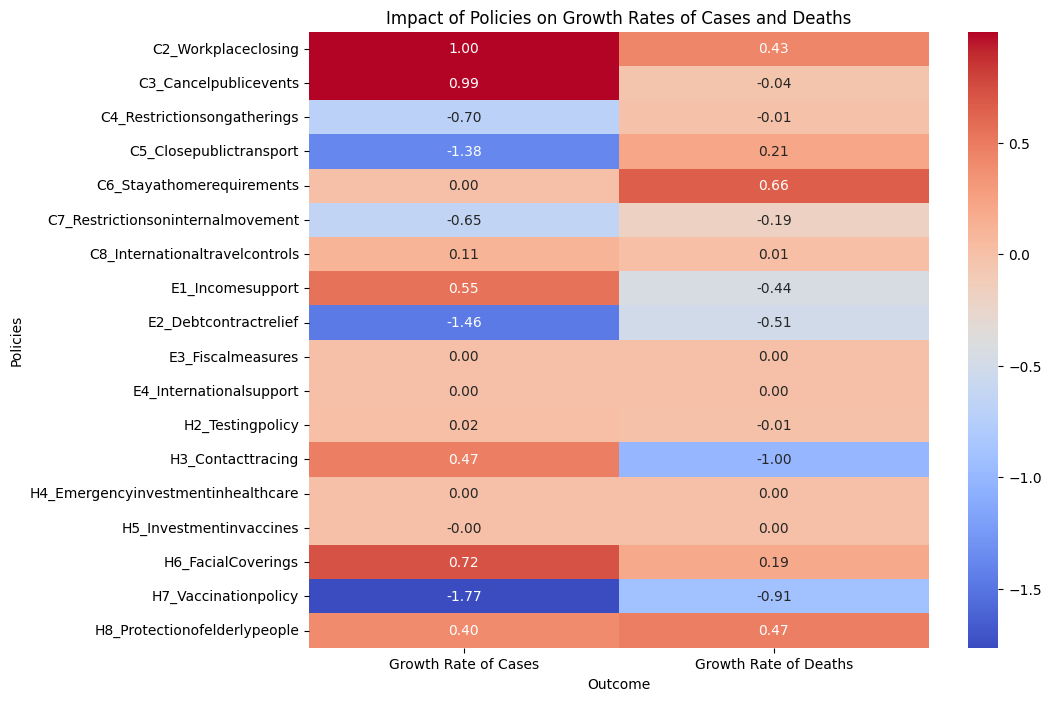

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Policies': [
        'C2_Workplaceclosing', 'C3_Cancelpublicevents',
        'C4_Restrictionsongatherings', 'C5_Closepublictransport',
        'C6_Stayathomerequirements', 'C7_Restrictionsoninternalmovement',
        'C8_Internationaltravelcontrols', 'E1_Incomesupport',
        'E2_Debtcontractrelief', 'E3_Fiscalmeasures', 'E4_Internationalsupport',
       'H2_Testingpolicy',
        'H3_Contacttracing', 'H4_Emergencyinvestmentinhealthcare',
        'H5_Investmentinvaccines', 'H6_FacialCoverings',
        'H7_Vaccinationpolicy', 'H8_Protectionofelderlypeople'
    ],
    'Growth Rate of Cases': [
        0.9986, 0.9913, -0.6994, -1.3770, 0.0020, -0.6531, 0.1107,
        0.5528, -1.4639, 1.72e-05, 3.027e-09, 0.0160,
        0.4716, 4.214e-08, -2.69e-09, 0.7246, -1.7653, 0.4010
    ],
    'Growth Rate of Deaths': [
        0.4334, -0.0432, -0.0063, 0.2147, 0.6566, -0.1861, 0.0096,
        -0.4421, -0.5094, 3.83e-13, 3.694e-11, -0.0056,
        -1.0011, 2.995e-10, 1.921e-10, 0.1908, -0.9113, 0.4712
    ]
}

coef_df = pd.DataFrame(data)


coef_df.set_index('Policies', inplace=True)

#Heat Map
plt.figure(figsize=(10, 8))
sns.heatmap(coef_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Impact of Policies on Growth Rates of Cases and Deaths')
plt.xlabel('Outcome')
plt.ylabel('Policies')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


# Assuming 'independent_vars' are the names of your independent variables
independent_vars = ['C2_Workplaceclosing', 'C3_Cancelpublicevents',
       'C4_Restrictionsongatherings',
       'C5_Closepublictransport', 'C6_Stayathomerequirements',
       'C7_Restrictionsoninternalmovement',
       'C8_Internationaltravelcontrols', 'E1_Incomesupport',
       'E2_Debtcontractrelief', 'E3_Fiscalmeasures','E4_Internationalsupport',
       'H1_Publicinformationcampaigns', 'H2_Testingpolicy',
       'H3_Contacttracing', 'H4_Emergencyinvestmentinhealthcare',
       'H5_Investmentinvaccines', 'H6_FacialCoverings',
       'H7_Vaccinationpolicy', 'H8_Protectionofelderlypeople']

# Define the target variable based on some condition, e.g., death growth rate < 1%
merged_data_corrected['Low_Growth'] = (merged_data_corrected['Sum of Death Growth Rate'] < 1).astype(int)

X = merged_data_corrected[independent_vars]
y = merged_data_corrected['Low_Growth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)


best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)


y_pred = best_rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


importances = best_rf.feature_importances_
columns = X.columns
importance_df = pd.DataFrame({'Feature': columns, 'Importance': importances})

top_features = importance_df.nlargest(10, 'Importance')
print('Top 10 Attributes:')
print(top_features)


Accuracy: 0.9029126213592233
Top 10 Attributes:
                              Feature  Importance
0                 C2_Workplaceclosing    0.209737
17               H7_Vaccinationpolicy    0.107008
18       H8_Protectionofelderlypeople    0.101579
5   C7_Restrictionsoninternalmovement    0.091037
4           C6_Stayathomerequirements    0.080431
8               E2_Debtcontractrelief    0.068389
2         C4_Restrictionsongatherings    0.055983
13                  H3_Contacttracing    0.045395
6      C8_Internationaltravelcontrols    0.043231
1               C3_Cancelpublicevents    0.040624
